# Quick calculations regarding one comment from the FC paper referee report

The referee pointed out that in Beutler et al.(2013), they marginalize over a 'stochasticity term'($N$). We incorrectly stated that this marginalization only affects the monopole, because $N$ is within the RSD factor: 
$$P_g(k, \mu) = e^{-(f k \mu \sigma_v))^2}[P_{g,\delta\delta}(k) + ...]$$
where
$$P_{g, \delta\delta} = b_1^2 P_{\delta \delta}(k) + ... + N$$

Therefore, $N$ affects $P_g(k, \mu)$ as follows: 
$$ P_{FC}(k, \mu) = e^{-(f k \mu \sigma_v)^2} N $$

While this clearly does *not* only affect the monopole, the impact on the multipole is unclear. More imporantly the impact on the cosmological parameter constraints are even less obvious. 

In [1]:
import pickle
import numpy as np 
from scipy.special import legendre
from scipy.integrate import quad as integ

import matplotlib.pyplot as plt
from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors
%matplotlib inline

In [2]:
prettyplot()
pretty_colors = prettycolors()

In [3]:
L0 = legendre(0)
L2 = legendre(2)
L4 = legendre(4)

In [4]:
def p_fc(k, mu, N, f=0.59, sig=4.6): 
    # P_FC(k, mu)
    # default f and sig_v values are the best-fits from Florian's paper
    return np.exp(-1.*(f * k * mu * sig)**2) * N 

Load $\Delta P(k) = P^{NN}(k) - P^{true}(k)$ data

In [5]:
pk_file = ''.join(['/Volumes/750GB/hahn/fibcol/', 'mock_catalog_NN_true_P024k_resid.rebin6x.figdata.p'])
pk_data = pickle.load(open(pk_file, 'rb'))
for i in range(len(pk_data)): 
    print i, pk_data[i]['name'], pk_data[i]['ell']

0 nseries 0
1 qpm 0
2 bigmd 0
3 nseries 2
4 qpm 2
5 bigmd 2
6 nseries 4
7 qpm 4
8 bigmd 4


## Fixing $f$ and $\sigma_v$ to the best-fit values from Beutler et al. (2014)
From Beutler et al.(2014)
$$f \sigma_8 \sim 0.423 \pm 0.052$$
$$\sigma_8 \sim 0.713 \pm 0.047$$
Then, 
$$f \sim 0.5932$$

$$\sigma_v = 4.6$$

## Impact on the multipoles

$$P_{l,FC} = \int_{-1}^{1} P_{FC}(k, \mu) \mathcal{L}_l(\mu) d\mu$$

In [6]:
def p_0_fc(k, N, f=0.59, sig=4.6): 
    integrand = lambda mmu: p_fc(k, mmu, N, f=f, sig=sig) * L0(mmu)
    return integ(integrand, -1., 1.)[0]

In [7]:
def p_2_fc(k, N, f=0.59, sig=4.6): 
    integrand = lambda mmu: p_fc(k, mmu, N, f=f, sig=sig) * L2(mmu)
    return integ(integrand, -1., 1.)[0]

In [29]:
def delP_l_Florian(ell, f, sig, N):
    fig = plt.figure(figsize=(10,6))
    sub = fig.add_subplot(111)
    sub.set_title('$f='+str(f)+', \sigma_v='+str(sig)+'$', fontsize=25)
    if ell == 0: 
        ell_index = 0
    elif ell == 2: 
        ell_index = 3
    
    # cosmic variance
    sub.fill_between(pk_data[ell_index]['k'], -1.0 * pk_data[ell_index]['cv'], pk_data[ell_index]['cv'], 
                     color='k', alpha=0.5, edgecolor=None)
    sub.plot([0.002, 1.], [0.0, 0.0], lw=3, ls='--', c='k')
    # residual
    sub.scatter(pk_data[ell_index]['k'], pk_data[ell_index]['resid'], 
                c='k', s=16, marker='x', label='$\Delta\mathtt{P_0}$')

    if type(N) == list: 
        pass
    else: 
        N = [N]
    print N
    for i_N, NN in enumerate(N): 
        Pfc = np.zeros(len(pk_data[ell_index]['k']))
        for i in range(len(pk_data[ell_index]['k'])): 
            if ell == 0: 
                Pfc[i] = p_0_fc(pk_data[ell_index]['k'][i], NN, f=f, sig=sig)
            elif ell == 2: 
                Pfc[i] = p_2_fc(pk_data[ell_index]['k'][i], NN, f=f, sig=sig)
                
        sub.plot(pk_data[ell_index]['k'], Pfc, 
                 c=pretty_colors[i_N+1], lw=3, label='$\mathtt{P_{'+str(ell)+', FC}}$; N='+str(int(NN)))

    # x-axis
    sub.set_xlim([1e-2, 1.])
    sub.set_xscale('log')
    sub.set_xlabel('k (h/Mpc)', fontsize=25)
    # y-axis
    if ell == 0: 
        sub.set_ylim([-1000, 1000])
        sub.set_yticks([1000, 500, 0, -500, -1000])
    elif ell == 2: 
        sub.set_ylim([-100, 600])
        sub.set_yticks([-100, 0, 200, 400, 600])
    sub.set_ylabel('$\Delta \mathtt{P_'+str(ell)+'(k)}$', fontsize=25)
    if ell == 0: 
        sub.legend(loc='lower right', prop={'size':20})
    elif ell == 2: 
        sub.legend(loc='upper right', prop={'size':20})
    return None

[-100.0, -200.0, -300.0, -400.0, -500.0]


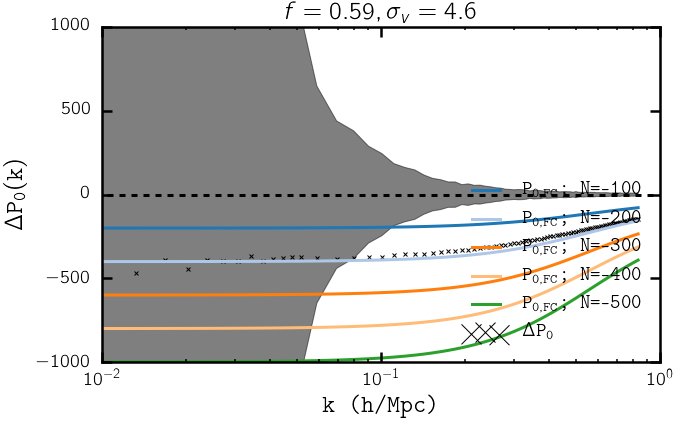

In [30]:
delP_l_Florian(0, 0.59, 4.6, [-100., -200., -300., -400., -500.])

[-100.0, -200.0, -300.0, -400.0, -500.0]


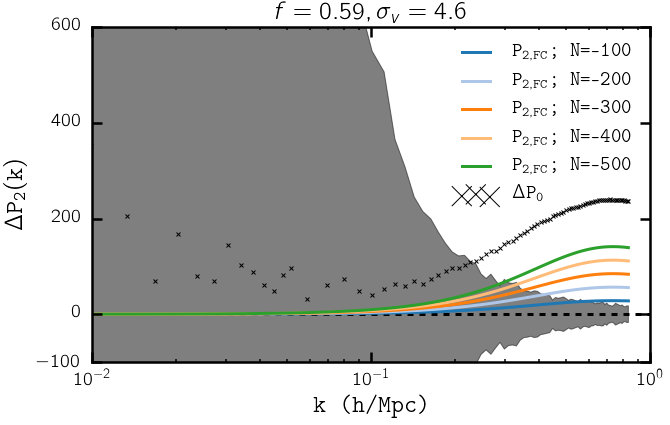

In [31]:
delP_l_Florian(2, 0.59, 4.6, [-100., -200., -300., -400., -500.])

## Florian's best-fit $N = 1080 \pm 620$

[460, 1080, 1700]
[460, 1080, 1700]


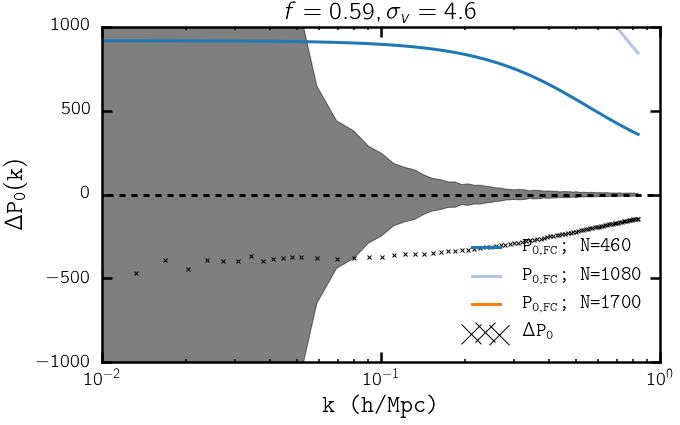

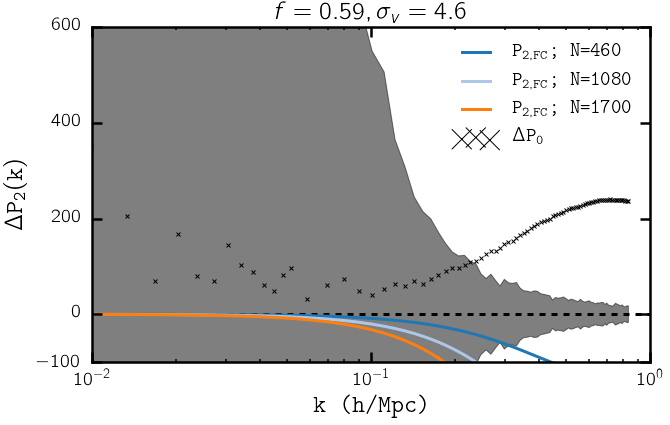

In [32]:
delP_l_Florian(0, 0.59, 4.6, [460, 1080, 1700])
delP_l_Florian(2, 0.59, 4.6, [460, 1080, 1700])